In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [ ]:
#Comparison of Tg vs non-Tg mice to confirm lack of effect/difference at alpha and betadiversity levels

#Group ONE: Male-Thy1-Vehicle (mice#41-50) vs Male-nonTg-vehicle (mice#21-30) at P22
#Group TWO: Female-Thy1-Vehicle (mice#51-60) vs Female-nonTg-vehicle (mice#31-40) at P22
#Group THREE: Male-Thy1-Vehicle (mice#101-110) vs Male-nonTg-vehicle (mice#81-90) at 7 weeks
#Group FOUR: Female-Thy1-Vehicle (mice#111-120) vs Female-nonTg-vehicle(mice#91-100) at 7 weeks

In [3]:
#Read in data from P22 mice (Tg vs Wildtype)
alz_nt = readRDS("/home/holutz/projects/Alzheimers/ps_files/alz2_nt.rds")
alz_t = readRDS("/home/holutz/projects/Alzheimers/ps_files/alz2_t.rds")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



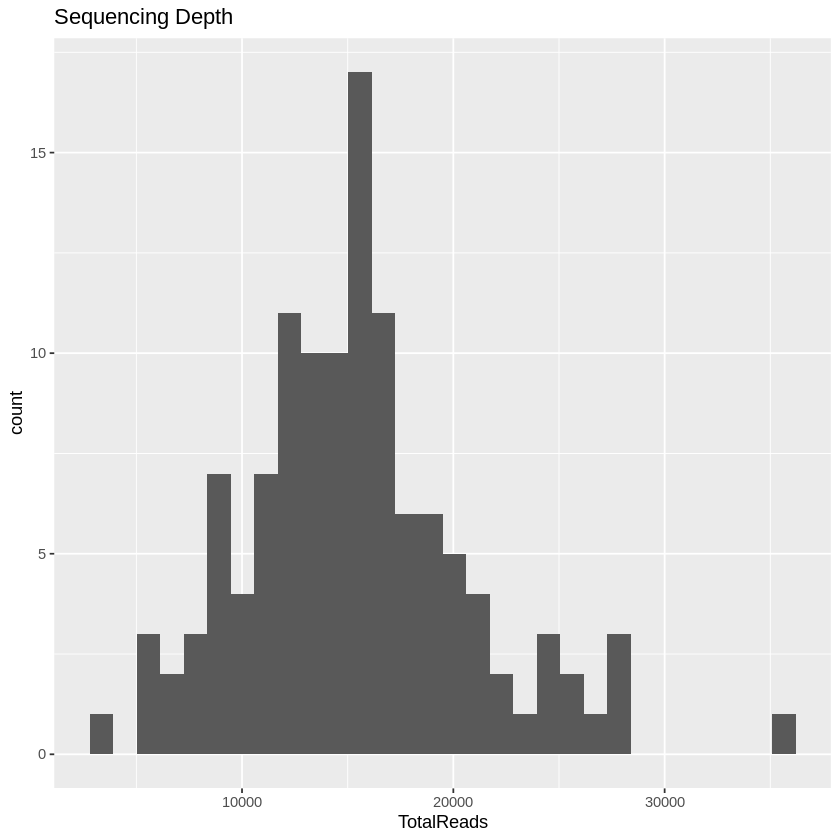

In [4]:
alz_sdt = data.table(as(sample_data(alz_nt), "data.frame"),
                 TotalReads = sample_sums(alz_nt), keep.rownames = TRUE)
setnames(alz_sdt, "rn", "SampleName")
pSeqDepth = ggplot(alz_sdt, aes(TotalReads)) + geom_histogram() + ggtitle("Sequencing Depth")
pSeqDepth


In [ ]:
##### TEMPORARY SUBSETTING FOR MMVEC FILES

M_CTR = subset_samples(alz_nt, Treatment=="vehicle")
M_ABX = subset_samples(alz_nt, Treatment=="abx")
M_ABX_FMT = subset_samples(alz_nt, Treatment=="abx + fmt")

In [5]:
sample_tab = data.frame(sample_data(alz_nt))
colnames(sample_tab)[1] <- "SampleID"
head(sample_tab$Treatment)

[1] vehicle vehicle abx     vehicle vehicle vehicle
Levels: abx vehicle

In [10]:
alz_group_one = subset_samples(alz_nt, Comparison_number=="One")
alz_group_two = subset_samples(alz_nt, Comparison_number=="Two")
alz_group_three = subset_samples(alz_nt, Comparison_number=="Three")
alz_group_four = subset_samples(alz_nt, Comparison_number=="Four")

In [26]:
#Observed richness by Tg vs wild type (group one)

obs = estimate_richness(na.omit(alz_group_one), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Transgenic") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Transgenic")

stats.obs = dfobs %>%
    group_by(Transgenic) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed))))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Transgenic, data=dfobs)
stats.krusk

Transgenic,median,mean,sd,sem
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
no,156,155.2,35.54278,11.239612
yes,172,172.0,13.56466,4.289522



	Kruskal-Wallis rank sum test

data:  Observed by Transgenic
Kruskal-Wallis chi-squared = 0.63095, df = 1, p-value = 0.427


In [27]:
#Observed richness by Tg vs wild type (group two)

obs = estimate_richness(alz_group_two, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Transgenic") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Transgenic")

stats.obs = dfobs %>%
    group_by(Transgenic) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed))))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Transgenic, data=dfobs)
stats.krusk

Transgenic,median,mean,sd,sem
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
no,205,189.3,37.15448,11.74928
yes,148,161.0,37.58250,11.88463



	Kruskal-Wallis rank sum test

data:  Observed by Transgenic
Kruskal-Wallis chi-squared = 3.0251, df = 1, p-value = 0.08198


In [28]:
#Observed richness by Tg vs wild type (group three)

obs = estimate_richness(alz_group_three, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Transgenic") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Transgenic")

stats.obs = dfobs %>%
    group_by(Transgenic) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed))))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Transgenic, data=dfobs)
stats.krusk

Transgenic,median,mean,sd,sem
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
no,223,222.5,33.16709,10.48835
yes,258,252.5,33.73508,10.66797



	Kruskal-Wallis rank sum test

data:  Observed by Transgenic
Kruskal-Wallis chi-squared = 4.6519, df = 1, p-value = 0.03102


In [29]:
#Observed richness by Tg vs wild type (group four)

obs = estimate_richness(alz_group_four, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Transgenic") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Transgenic")

stats.obs = dfobs %>%
    group_by(Transgenic) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed))))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Transgenic, data=dfobs)
stats.krusk

Transgenic,median,mean,sd,sem
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
no,251.5,245.3,48.24947,15.25782
yes,221.0,226.1,48.49158,15.33438



	Kruskal-Wallis rank sum test

data:  Observed by Transgenic
Kruskal-Wallis chi-squared = 0.69143, df = 1, p-value = 0.4057


In [73]:
#FDR p-value correction
p = c("0.427","0.082","0.031","0.406")
p.adjust(p, method = "fdr", n = length(p))

[1] 0.427 0.164 0.124 0.427

### UNWEIGHTED UNIFRAC

In [30]:
alz_group_one = subset_samples(alz_t, Comparison_number=="One")
alz_group_two = subset_samples(alz_t, Comparison_number=="Two")
alz_group_three = subset_samples(alz_t, Comparison_number=="Three")
alz_group_four = subset_samples(alz_t, Comparison_number=="Four")

In [31]:
alz_group_one.df = data.frame(sample_data(alz_group_one))
alz_group_two.df = data.frame(sample_data(alz_group_two))
alz_group_three.df = data.frame(sample_data(alz_group_three))
alz_group_four.df = data.frame(sample_data(alz_group_four))

In [33]:
#Unweighted UniFrac

alz.dist.unif.1 = distance(alz_group_one, method = "unifrac", type = "samples")
alz.unif.adtest.1 = adonis2(alz.dist.unif.1 ~ Transgenic, data=alz_group_one.df)
alz.unif.adtest.1

alz.dist.unif.2 = distance(alz_group_two, method = "unifrac", type = "samples")
alz.unif.adtest.2 = adonis2(alz.dist.unif.2 ~ Transgenic, data=alz_group_two.df)
alz.unif.adtest.2

alz.dist.unif.3 = distance(alz_group_one, method = "unifrac", type = "samples")
alz.unif.adtest.3 = adonis2(alz.dist.unif.3 ~ Transgenic, data=alz_group_three.df)
alz.unif.adtest.3

alz.dist.unif.4 = distance(alz_group_one, method = "unifrac", type = "samples")
alz.unif.adtest.4 = adonis2(alz.dist.unif.4 ~ Transgenic, data=alz_group_four.df)
alz.unif.adtest.4

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- GACGGGGGGGGCAAGTGTTCTTCGGAATGACTGGGCGTAAAGGGCACGTAGGCGGTGAATCGGGTTGAAAGTGAAAGTCGCCAAAAAGTGGCGGAATGCTCTCGAAACCAATTCACTTGAGTGAGACAGAGGAGAGTGGAATTTCGTGTG -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.1500127,0.09670441,1.927032,0.004
Residual,18,1.4012369,0.90329559,NA,NA
Total,19,1.5512496,1.00000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGAGGCAAGCGTTATCCGGAATGACTGGGCGTAAAGGGTGCGTAGGTGGTTCAGCAAGTTAGTAGCGTAACTCCGGGGCTCAACCTCGGCACTACTACTAAAACTGTTGGACTTGAGTGCAGGAGGGGCAACTGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.09447389,0.05195082,0.9863567,0.438
Residual,18,1.72405179,0.94804918,NA,NA
Total,19,1.81852569,1.00000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTATTTTAAGTTAGTGGTAAAACGTCGGGGCTTCACCTTGATTGGCCATTAAAACTGGAGTACTAGAGTACAGACGAGGTAGGCGGAATAAGTTAA -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.06270256,0.03668096,0.6853983,0.899
Residual,18,1.64670100,0.96331904,NA,NA
Total,19,1.70940356,1.00000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGGGGCAAGTCTGGAGTGAAAGGCCGGGGCCCAACCCCGGGACCGCTCTGGAAACTGCCCGGCTGGAGTGCGGGAGAGGTAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.08475462,0.04977413,0.9428647,0.546
Residual,18,1.61802973,0.95022587,NA,NA
Total,19,1.70278435,1.00000000,NA,NA


In [75]:
#FDR p-value correction for unweighted UniFrac PERMANOVA
p = c("0.004","0.438","0.899","0.546")
p.adjust(p, method = "fdr", n = length(p))

[1] 0.016 0.728 0.899 0.728

In [34]:
#Weighted wunifrac

alz.dist.wunif.1 = distance(alz_group_one, method = "wunifrac", type = "samples")
alz.wunif.adtest.1 = adonis2(alz.dist.wunif.1 ~ Transgenic, data=alz_group_one.df)
alz.wunif.adtest.1

alz.dist.wunif.2 = distance(alz_group_two, method = "wunifrac", type = "samples")
alz.wunif.adtest.2 = adonis2(alz.dist.wunif.2 ~ Transgenic, data=alz_group_two.df)
alz.wunif.adtest.2

alz.dist.wunif.3 = distance(alz_group_one, method = "wunifrac", type = "samples")
alz.wunif.adtest.3 = adonis2(alz.dist.wunif.3 ~ Transgenic, data=alz_group_three.df)
alz.wunif.adtest.3

alz.dist.wunif.4 = distance(alz_group_one, method = "wunifrac", type = "samples")
alz.wunif.adtest.4 = adonis2(alz.dist.wunif.4 ~ Transgenic, data=alz_group_four.df)
alz.wunif.adtest.4

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGTCCAAGCATTATCCGGAGTGACTGGGTGTAAAGAGTTGCGTAGGTGGCATAATAAGTAACTAGTGAAATCTGGTGGCTCAACCATTCAGACTATTAGTTAAACTGTTAAGCTCGAGACCGTTAGGGGTAACTGGAATTTCT -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.01425072,0.0853592,1.679857,0.109
Residual,18,0.15269935,0.9146408,NA,NA
Total,19,0.16695008,1.0000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCACGGCAAGCCAGATGTGAAAGCCCGGGGCTCAACCCCGGGACTGCATTTGGAACTGCTGAGCTAGAGTGTCGGAGAGGCAAGTGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.02503609,0.05859218,1.1203,0.32
Residual,18,0.40225799,0.94140782,NA,NA
Total,19,0.42729408,1.00000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGATCCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGATTGATAAGTTAGAGGTGAAATGTCCGAGCTCAACTCGGGAACTGCCTCTAATACTGTTGATCTAGAGAGTAGATGCGGTAGGCGGAATGTATGG -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.0125553,0.02811026,0.5206195,0.866
Residual,18,0.4340893,0.97188974,NA,NA
Total,19,0.4466446,1.00000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGCAGCAAGTCTGATGTGAAAGGCAGGGGCTTAACCCCTGGACTGCATTGGAAACTGCTGTGCTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.02342335,0.06637437,1.279676,0.252
Residual,18,0.32947409,0.93362563,NA,NA
Total,19,0.35289744,1.00000000,NA,NA


In [74]:
#FDR p-value correction for weighted UniFrac PERMANOVA
p = c("0.109","0.32","0.866","0.252")
p.adjust(p, method = "fdr", n = length(p))

[1] 0.4266667 0.4266667 0.8660000 0.4266667

In [35]:
#Bray Curtis

alz.dist.bc.1 = distance(alz_group_one, method = "bray", type = "samples")
alz.bc.adtest.1 = adonis2(alz.dist.bc.1 ~ Transgenic, data=alz_group_one.df)
alz.bc.adtest.1

alz.dist.bc.2 = distance(alz_group_two, method = "bray", type = "samples")
alz.bc.adtest.2 = adonis2(alz.dist.bc.2 ~ Transgenic, data=alz_group_two.df)
alz.bc.adtest.2

alz.dist.bc.3 = distance(alz_group_one, method = "bray", type = "samples")
alz.bc.adtest.3 = adonis2(alz.dist.bc.3 ~ Transgenic, data=alz_group_three.df)
alz.bc.adtest.3

alz.dist.bc.4 = distance(alz_group_one, method = "bray", type = "samples")
alz.bc.adtest.4 = adonis2(alz.dist.bc.4 ~ Transgenic, data=alz_group_four.df)
alz.bc.adtest.4

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.3370569,0.12469,2.564142,0.004
Residual,18,2.3661028,0.87531,NA,NA
Total,19,2.7031597,1.00000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.124541,0.03809051,0.7127792,0.791
Residual,18,3.145066,0.96190949,NA,NA
Total,19,3.269607,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.09004545,0.03331118,0.620263,0.869
Residual,18,2.61311426,0.96668882,NA,NA
Total,19,2.70315970,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transgenic,1,0.1406336,0.05202563,0.9878552,0.439
Residual,18,2.5625261,0.94797437,NA,NA
Total,19,2.7031597,1.00000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGAGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGTGCGTAGGCGGCTTTGCAAGTCAGATGTGAAATCTATGGGCTCAACCCATAAACTGCATTTGAAACTGTAGAGCTTGAGTGAAGTAGAGGCAGGCGGAATTCCCCG -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTGTAAAGGGAGAGTAGGCGGCAAGGTAAGCGATATGTGAAAGCCTTAGGCTTAACCTGAGGATTGCATAACGAACTATCTAGCTAGAGTACAGGAGAGGAAAGCGGAATTCTTAG -- in the phylogenetic tree in the data you provided.”


png 
  2

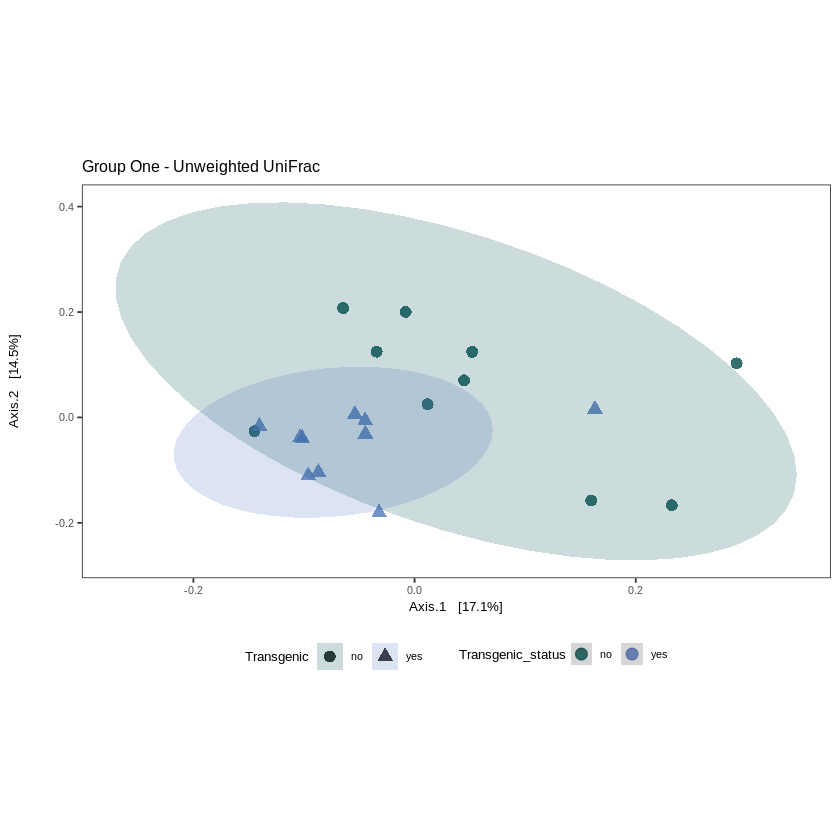

In [65]:
#Group ONE - UNIFRAC

alz.dist.one = distance(alz_group_one, method = "unifrac", type = "samples")
alz.dist.log.one = ordinate(alz_group_one, method = "PCoA", distance = "unifrac")
alz.dist.evals.one = alz.dist.log.one$values$Eigenvalues.one

p = plot_ordination(alz_group_one, alz.dist.log.one, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group One - Unweighted UniFrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +
    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g1.unif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGTGGCGAGCGTTATCCGGAATTATTGGGCGTAAAGAGGGAGCAGGCGGCAGCTAAGGTCTGCGGTGAAAGCCCGAAGCTAAACTTCGGTAAGCCGTGGAAACCGAGCAGCTAGAGTGCAGTAGAGGATCGTGGAATTCCATGT -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGAGCAAGCGTTATCCGGATTTATTGGGTGTAAAGGGTGCGTAGACGGAGAAGCAAGTTAGTTGTGAAATCCCTCGGCTTAACTGAGGAACTGCAACTAAAACTACTTCCCTTGAGTACTGGAGAGGAAAGTGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


png 
  2

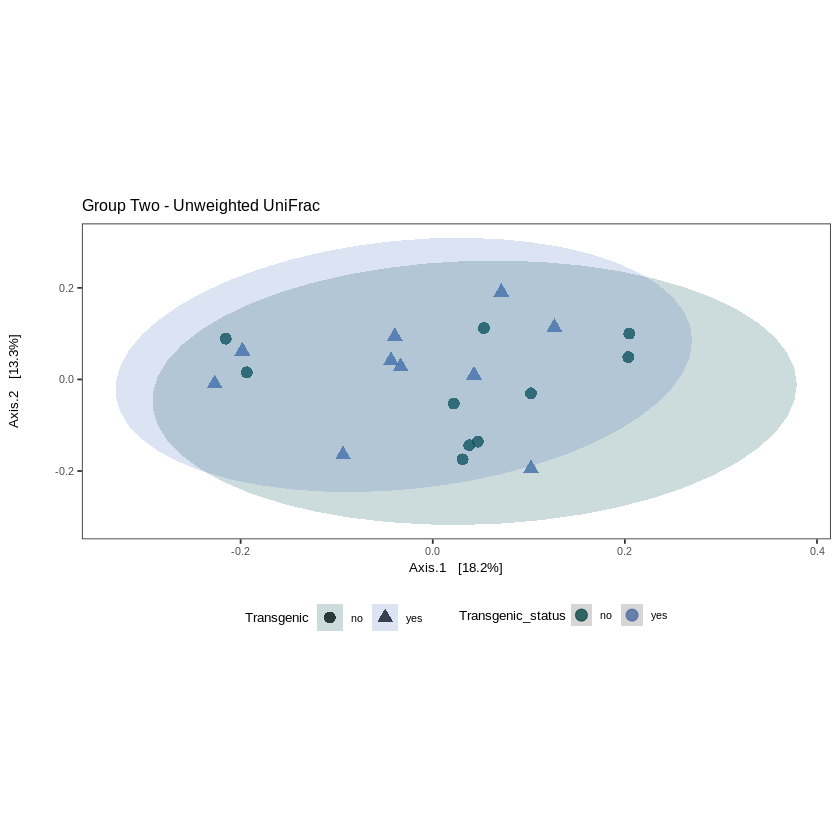

In [66]:
#Group two - UNIFRAC

alz.dist.two = distance(alz_group_two, method = "unifrac", type = "samples")
alz.dist.log.two = ordinate(alz_group_two, method = "PCoA", distance = "unifrac")
alz.dist.evals.two = alz.dist.log.two$values$Eigenvalues.two

p = plot_ordination(alz_group_two, alz.dist.log.two, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group Two - Unweighted UniFrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +
    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g2.unif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGCTTTGCAAGTCTGATGTGAAAGGCCGGGGCTCAACCCCGGGACTGCATTGGAAACTGTAAAGCTAGAGTGCCGGAGAGGTAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGGACTGCAAGTCAGGCGTGAAAACCAGAGGCTCAACCTCTGGCCTGCGTTTGAAACTGTGGTTCTTGAGTACTGGAGAGGTTGACGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


png 
  2

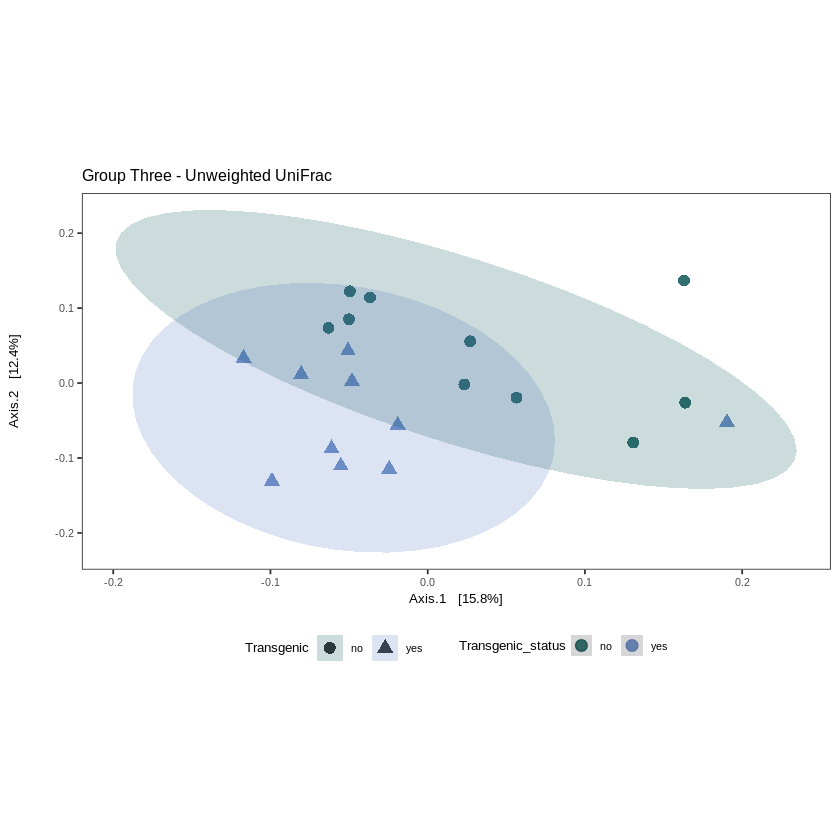

In [67]:
#Group three - UNIFRAC

alz.dist.three = distance(alz_group_three, method = "unifrac", type = "samples")
alz.dist.log.three = ordinate(alz_group_three, method = "PCoA", distance = "unifrac")
alz.dist.evals.three = alz.dist.log.three$values$Eigenvalues.three

p = plot_ordination(alz_group_three, alz.dist.log.three, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group Three - Unweighted UniFrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +
    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g3.unif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTATGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGCCTGCCAAGTCTGGTGTGAAAACCCGGGGCCCAACCCCGGGCCTGCATTGGAAACTGGCGGGCTGGAGTGTCGGAGGGGCAGGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGGGCGAGCGTTATCCGGATTCACTGGGTGTAAAGGGAGCGTAGACGGCCATGCAAGCCAGGGGTGAAAGCCCGGGGCCCAACCCCGGGACTGCCCTTGGAACTGTGCGGCTAGAGTGCGGGAGGGGCAGGCGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”


png 
  2

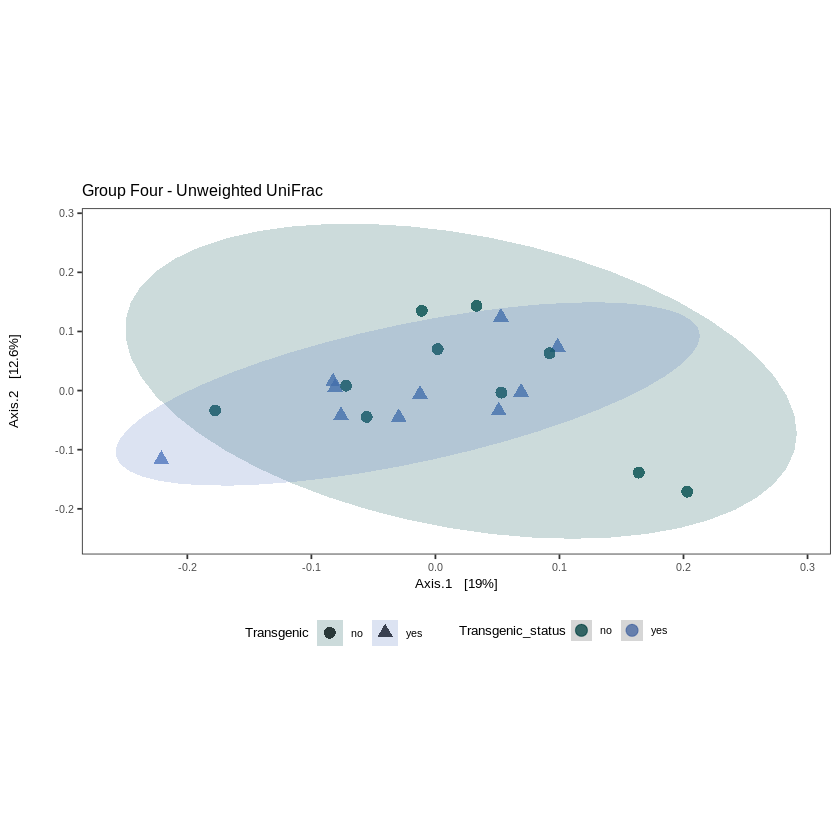

In [68]:
#Group four - UNIFRAC

alz.dist.four = distance(alz_group_four, method = "unifrac", type = "samples")
alz.dist.log.four = ordinate(alz_group_four, method = "PCoA", distance = "unifrac")
alz.dist.evals.four = alz.dist.log.four$values$Eigenvalues.four

p = plot_ordination(alz_group_four, alz.dist.log.four, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group Four - Unweighted UniFrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g4.unif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCGAGCGTTATCCGGATTCATTGGGCGTAAAGCGCGCGTAGGCGGTCATGTAAGCGGGACCTCTAATCTTGGGGCTCAACCTCAAGCCGGGTTCCGAACTACATGACTCGAGTGTGGTAGGGGAGATCGGAATTCCCGGT -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGTTGACAAGTCAGATGTGAAATCCTGCGGCTTAACCGCAGAACTGCATTTGAAACTGTTGATCTTGAGTACTGGAGAGGCAGACGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


png 
  2

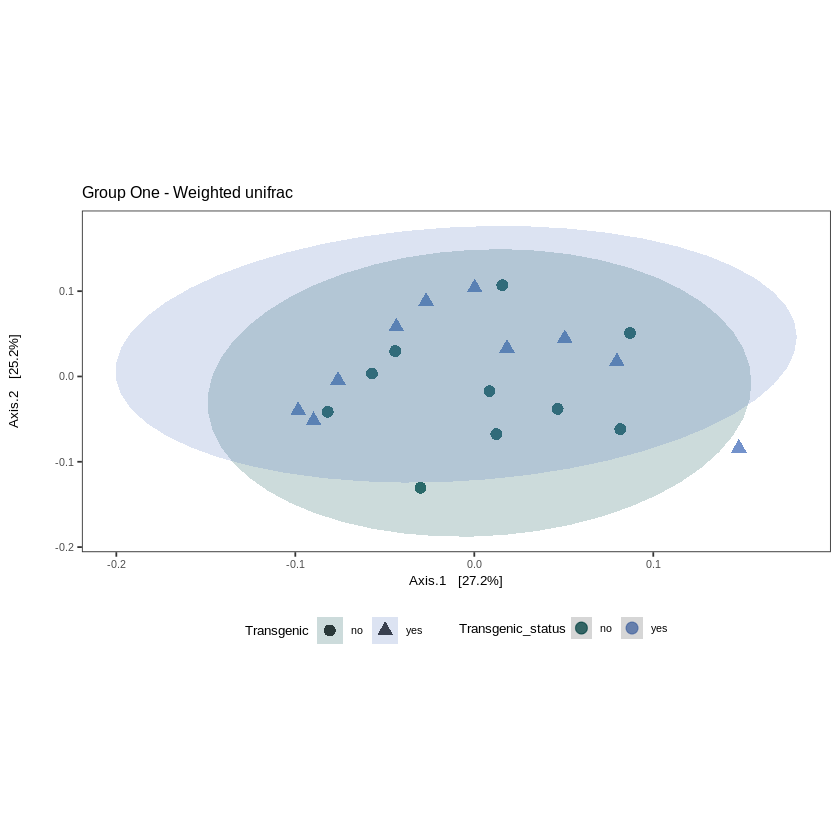

In [69]:
#Group ONE - WUNIFRAC

alz.dist.one = distance(alz_group_one, method = "wunifrac", type = "samples")
alz.dist.log.one = ordinate(alz_group_one, method = "PCoA", distance = "wunifrac")
alz.dist.evals.one = alz.dist.log.one$values$Eigenvalues.one

p = plot_ordination(alz_group_one, alz.dist.log.one, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group One - Weighted unifrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g1.wunif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGTGCGTAGGTGGCAGGGCAAGTCAGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTTGAAACTGTCCAGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGACGGCTGTGCAAGTCTGGAGTGAAAGGCGGGGGCTCAACCCCCGGACTGCTCTGGAAACTGTAAAGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


png 
  2

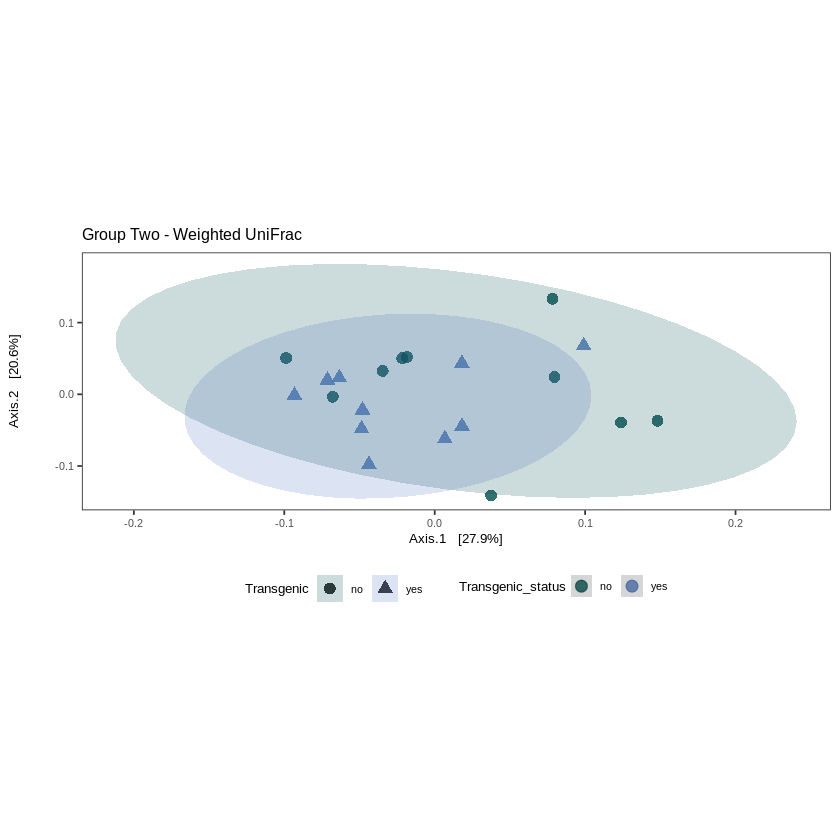

In [70]:
#Group two - WUNIFRAC

alz.dist.two = distance(alz_group_two, method = "wunifrac", type = "samples")
alz.dist.log.two = ordinate(alz_group_two, method = "PCoA", distance = "wunifrac")
alz.dist.evals.two = alz.dist.log.two$values$Eigenvalues.two

p = plot_ordination(alz_group_two, alz.dist.log.two, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group Two - Weighted UniFrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g2.wunif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTCTTAAGTCAGCGGTAAAAATGCGGCGCTCAACGCCGTCGAGCCGTTGAAACTGGGAGCCTAGAGTGGGCGAGAAGTATGCGGAATGCGTGGT -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGAGGCAAGCGTTATCCGGAATGACTGGGCGTAAAGGGTGCGTAGGTGGTTTGGCAAGTTGGTAGCGTAATCCCGGGGCTCAACCTCGGTGCTACTACCAAAACTGCTGGGCTTGAGTGCAGGAGGGGTGAATGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”


png 
  2

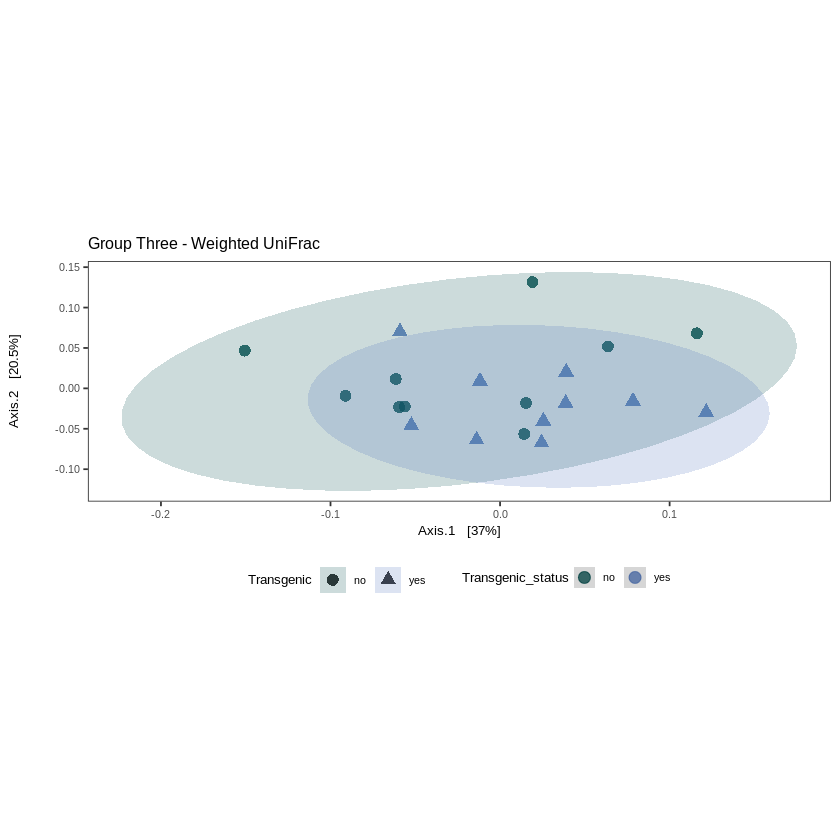

In [71]:
#Group three - WUNIFRAC

alz.dist.three = distance(alz_group_three, method = "wunifrac", type = "samples")
alz.dist.log.three = ordinate(alz_group_three, method = "PCoA", distance = "wunifrac")
alz.dist.evals.three = alz.dist.log.three$values$Eigenvalues.three

p = plot_ordination(alz_group_three, alz.dist.log.three, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group Three - Weighted UniFrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g3.wunif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGAGCGAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGACGGCAAGTCAGATGTGAAAACTGAGGGCTCAACCTTCAGACTGCATTTGAAACTGCTGTTCTTGAGTGAAGTAGAGGTAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGT -- in the phylogenetic tree in the data you provided.”


png 
  2

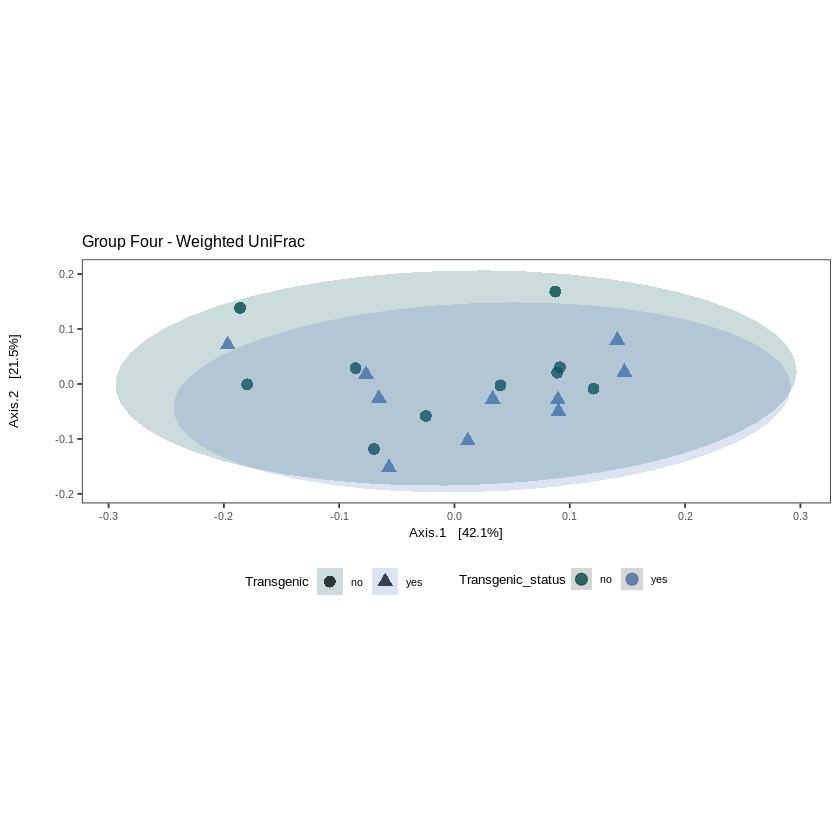

In [72]:
#Group four - WUNIFRAC

alz.dist.four = distance(alz_group_four, method = "wunifrac", type = "samples")
alz.dist.log.four = ordinate(alz_group_four, method = "PCoA", distance = "wunifrac")
alz.dist.evals.four = alz.dist.log.four$values$Eigenvalues.four

p = plot_ordination(alz_group_four, alz.dist.log.four, color = "Transgenic", shape = "Transgenic") + #, label="X.SampleID") + 
    ggtitle("Group Four - Weighted UniFrac") +
    geom_point(size=3, alpha=0.8) + 
    #scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_colour_manual(values=c("#004d4d", "#5077be")) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Transgenic), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    scale_fill_manual(values=c("#004d4d", "#5077be")) +    coord_fixed(sqrt(alz.dist.evals[2] / alz.dist.evals[1]))

p = p + guides(colour = guide_legend(title = "Transgenic_status", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

png('/home/holutz/projects/Alzheimers/Update_for_reviewers/bdiv_plots/g4.wunif.pcoa.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()